In [9]:
## Generate the random data
import numpy as np
np.random.seed(42) ## To be able to recreate the results
# (b - a) * random_sample() + a -> Random number between b = -5 and a = 5
betas = -10 * np.random.random_sample((101,1)) + 5
# The intercept column
x0 = np.ones([1000,1])
# Random values for the variables between 0 and 10 following a uniform distribution
x1 = np.random.uniform(0,10,([1000,100]))
x = np.concatenate([x0, x1], axis=1)
error = np.random.normal(0,1,[1000,1])
y = np.dot(x,betas)+error
y.shape

(1000, 1)

a) Estimate the value of the regression coefficients by implementing the analytical solution

In [10]:
## Helper function to compare the value of the Betas
import matplotlib.pyplot as plt
def compare(betas1, betas2):
    # compare the coefficients
    plt.plot(betas1[:,0]-betas2[:,0], color='g')

    barWidth = 0.4
    x1 = np.asarray([i for i in range(101)])
    x2 = barWidth*np.ones(101)+x1

    #[i for i in range(betas1.shape[0])]
    #[np.int(i)+barWidth for i in range(betas2.shape[0])]
    plt.bar(x1, betas1[:,0], color='b', width=barWidth, edgecolor='white', label='Mod1')
    plt.bar(x2, betas2[:,0], color='r', width=barWidth, edgecolor='white', label='Mod2')

    plt.legend()
    plt.title("Coefficient comparison")
    plt.xlabel('Variables', fontweight='bold')
    plt.ylabel('Values of the coefficients', fontweight='bold')
    fig = plt.gcf()
    fig.set_size_inches(15,5)
    plt.show()

(101, 1)


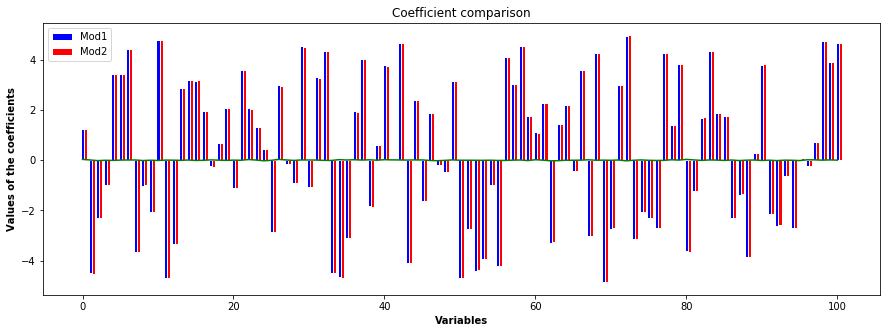

In [11]:
from numpy.linalg import inv
beta_ls_exact = np.dot(np.dot(inv(np.dot(x.T,x)),x.T),y)
print(beta_ls_exact.shape)
compare(betas, beta_ls_exact)

b) Estimate the value of the regression coefficients by using the function minimize from the Python module Scipy.optimize. Trying out at least 4 solvers.

In [12]:
## Least squares of a given model (function to be minimized during the optimization process)
def least_sq_reg(beta_ls, x, y):
    beta_ls=np.matrix(beta_ls)
    z=y-np.dot(x,beta_ls.T)
    return np.dot(z.T,z)

#### Nelder-Mead
- Explanntion of the algorithm (https://pdfs.semanticscholar.org/15b4/c4aa7437df4d032c6ee6ce98d6030dd627be.pdf)

Optimization terminated successfully.
         Current function value: 6026913.830667
         Iterations: 298651
         Function evaluations: 315710
time elapsed= 29.823482669288424
(101, 1)


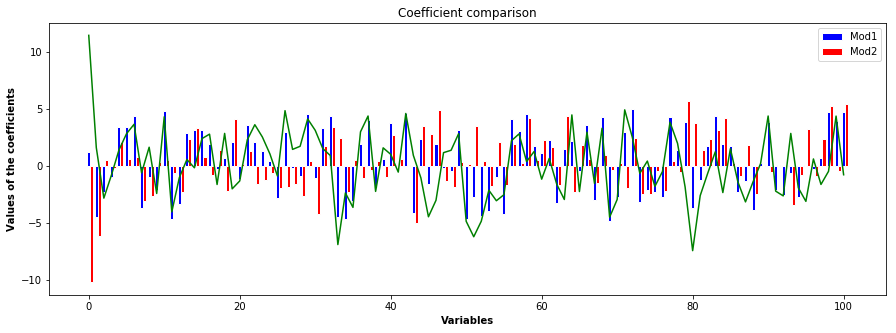

error= 1.0079861994604398


In [13]:
from scipy.optimize import minimize
import time

beta_ls0 = np.zeros(101) # Initial guess for the coefficients
time_start = time.clock()
res = minimize(least_sq_reg, beta_ls0, args=(x, y), method='Nelder-Mead', options={'disp': True, 'maxiter': 500000})
nfev = res.nfev
nit = res.nit

time_elapsed = (time.clock() - time_start)
print('time elapsed=',time_elapsed)
betas_res = res.x
betas_res = np.reshape(betas_res, (101,1))
print(betas_res.shape)
compare(beta_ls_exact, betas_res) 
print('error=',np.linalg.norm(beta_ls_exact.T-res.x,ord=2)/np.linalg.norm(beta_ls_exact.T,ord=2))

In [14]:
print(res)

 final_simplex: (array([[-10.23251846,  -6.11436413,   0.52966849, ...,   5.22386044,
         -0.45883724,   5.46408286],
       [-10.23252887,  -6.11436641,   0.52966091, ...,   5.22385977,
         -0.45882772,   5.46408993],
       [-10.23252247,  -6.11436311,   0.52965112, ...,   5.22385439,
         -0.45883185,   5.46408381],
       ...,
       [-10.23251734,  -6.11437135,   0.52965764, ...,   5.22385181,
         -0.45883178,   5.46407513],
       [-10.23252319,  -6.11436886,   0.52965131, ...,   5.22385086,
         -0.45883328,   5.46407557],
       [-10.23253594,  -6.11438219,   0.52966249, ...,   5.22385888,
         -0.45882613,   5.46408525]]), array([6026913.83066681, 6026913.83067068, 6026913.83067145,
       6026913.83067184, 6026913.83067301, 6026913.83067328,
       6026913.83067723, 6026913.8306795 , 6026913.83068061,
       6026913.83068584, 6026913.83068735, 6026913.83069214,
       6026913.83069536, 6026913.83069695, 6026913.83069865,
       6026913.83069893, 602

#### Powell
- Explanation of the algorithm (https://www.ime.unicamp.br/~sandra/MS612/handouts/Fletcher1965.pdf)

Optimization terminated successfully.
         Current function value: 11094.492845
         Iterations: 393
         Function evaluations: 358873
time elapsed= 30.62409779941828
(101, 1)


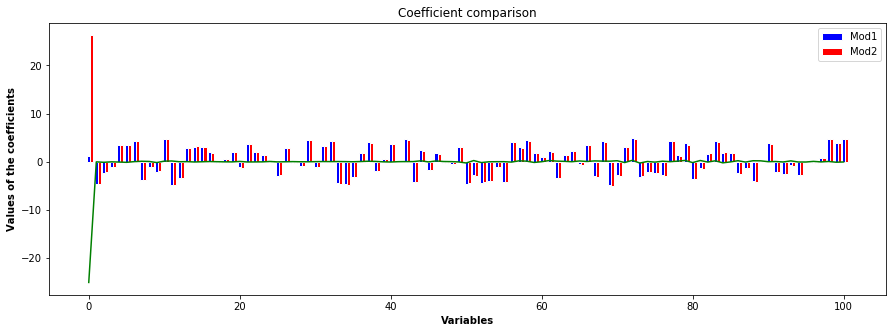

error= 0.8322072659856041


In [15]:
beta_ls0 = np.zeros(101) # Initial guess for the coefficients
time_start = time.clock()
res = minimize(least_sq_reg, beta_ls0, args=(x, y), method='Powell', options={'disp': True, 'maxiter': 500000})
time_elapsed = (time.clock() - time_start)

nfev = res.nfev
nit = res.nit

print('time elapsed=',time_elapsed)
betas_res = np.asarray(res.x)
betas_res = np.reshape(betas_res, (101,1))
print(betas_res.shape)
compare(beta_ls_exact, betas_res) 
print('error=',np.linalg.norm(beta_ls_exact.T-res.x,ord=2)/np.linalg.norm(beta_ls_exact.T,ord=2))

#### Conjugate Gradient
- Explanation of the algorithm

In [16]:
# The conjugate gradient method needs the first derivative of the objective function
def least_sq_reg_der(beta_ls,X,Y):
    beta_ls = np.matrix(beta_ls)
    pp = -2*np.dot((Y-np.dot(X,beta_ls.T)).T,X)
    aa = np.squeeze(np.asarray(pp))
    return aa


         Current function value: 982.017753
         Iterations: 38
         Function evaluations: 158
         Gradient evaluations: 146
time elapsed= 0.027477733077006405
(101, 1)


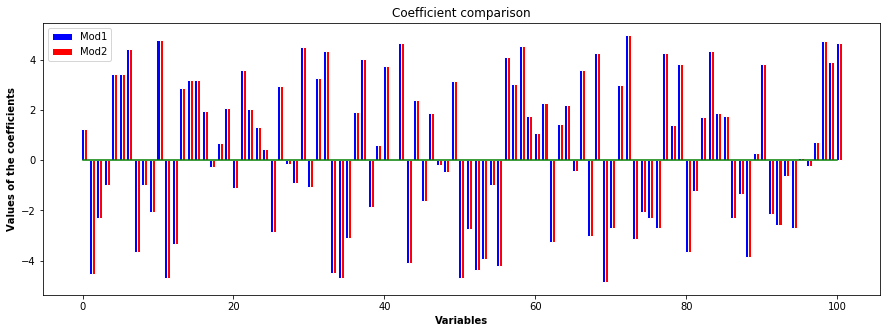

error= 5.640629626744031e-10


In [17]:
beta_ls0 = np.zeros(101) # Initial guess for the coefficients
time_start = time.clock()
res = minimize(least_sq_reg, beta_ls0, jac=least_sq_reg_der, args=(x, y), method='CG', options={'disp': True})
time_elapsed = (time.clock() - time_start)

nfev = res.nfev
nit = res.nit

print('time elapsed=',time_elapsed)
betas_res = res.x
betas_res = np.reshape(betas_res, (101,1))
print(betas_res.shape)
compare(beta_ls_exact, betas_res) 
print('error=',np.linalg.norm(beta_ls_exact.T-res.x,ord=2)/np.linalg.norm(beta_ls_exact.T,ord=2))

#### Newton Conjugate Gradient
- Explanation of the algorithm

In [18]:
# Even though the second derivative is not a requisite (as isn't the firs derivative in the previous case) we will provide it
def least_sq_reg_hess(beta_ls,X,Y):
    ss=2*np.dot(np.transpose(X),X)
    return ss

C:\Users\alvaro\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:507: RuntimeWarning: Method CG does not use Hessian information (hess).
  RuntimeWarning)


         Current function value: 982.017753
         Iterations: 38
         Function evaluations: 158
         Gradient evaluations: 146
time elapsed= 0.0348014575243667
(101, 1)


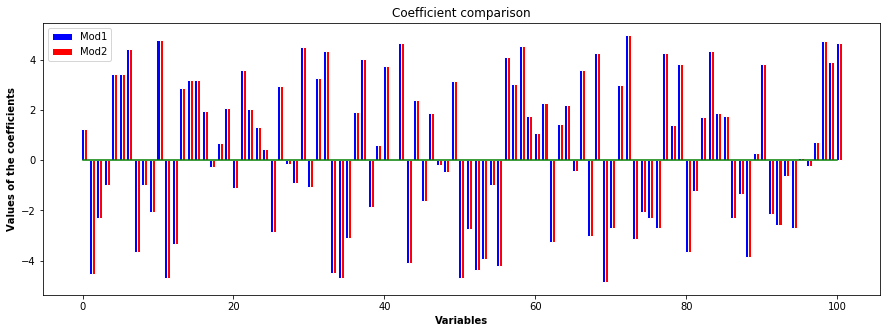

error= 5.640629626744031e-10


In [19]:
beta_ls0 = np.zeros(101) # Initial guess for the coefficients
time_start = time.clock()
res = minimize(least_sq_reg, beta_ls0, jac=least_sq_reg_der, hess=least_sq_reg_hess, args=(x, y), method='CG', options={'disp': True})
time_elapsed = (time.clock() - time_start)

nfev = res.nfev
nit = res.nit

print('time elapsed=',time_elapsed)
betas_res = res.x
betas_res = np.reshape(betas_res, (101,1))
print(betas_res.shape)
compare(beta_ls_exact, betas_res) 
print('error=',np.linalg.norm(beta_ls_exact.T-res.x,ord=2)/np.linalg.norm(beta_ls_exact.T,ord=2))

c) Estimate the value of the regression coefficients by implementing:

i. Gradient Method.

ii. Newton Method.

iii. Quasi-Newton Method.

iv. Stochastic Gradient Method.

#### Gradient Method implementation

0
time elapsed= 0.8164969965545765


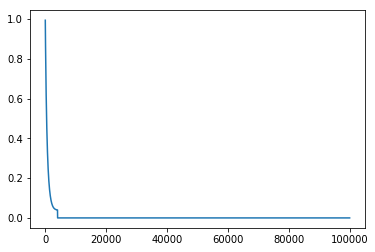

In [20]:
def gradDesc(x, y, obj_fun, jac, lr = 0.001, iterations = 100000, tol = 0.04):
    beta_lsg = np.zeros(101)
    OF_iter=np.zeros(iterations)
    tol_hist=np.zeros(iterations)
    print_step = iterations/10
    for it in range(iterations):
        if (it%print_step == 0):
            print(it)
        grad = jac(beta_lsg, x, y)
        sigma = 0.1
        beta = 0.1
        while (obj_fun(beta_lsg+lr*(-grad), x, y) > least_sq_reg(beta_lsg,x,y)+lr*sigma*np.dot(grad,-grad)):
            lr=lr*beta
        beta_lsg = beta_lsg+lr*(-grad)
        OF_iter[it] = obj_fun(beta_lsg,x,y)
        tol_val = np.linalg.norm(beta_ls_exact.T-beta_lsg,ord=2)/np.linalg.norm(beta_ls_exact.T,ord=2)
        tol_hist[it] = tol_val
        if (tol_val < tol):
            break
    return (beta_lsg, OF_iter, tol_hist)

time_start = time.clock()
(beta_gd, of_gd, tol_gd) = gradDesc(x, y, least_sq_reg, least_sq_reg_der)
time_elapsed = (time.clock() - time_start)
print('time elapsed=',time_elapsed)

plt.plot(tol_gd)

0.039999815843648305


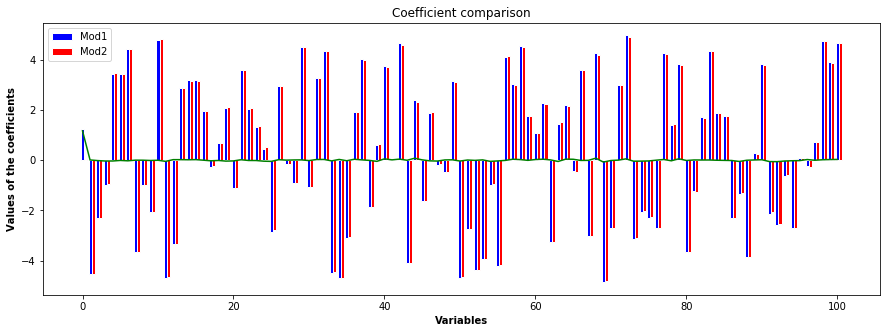

In [21]:
print(min(tol_gd[tol_gd>0]))
compare(beta_ls_exact, np.reshape(beta_gd, (101,1)))

#### Newton Method implementation

Iteration: 0
[ -3262.09208093 -15310.66336627 -15700.32594123 -16601.67171804
 -17014.11562266 -16976.31124844 -17651.90332267 -15657.79084753
 -15984.74218062 -15526.07461434 -16870.64583109 -15216.86657286
 -15560.74683951 -16355.48358388 -17047.47201415 -16624.88973565
 -16072.89306978 -16772.06704361 -16523.07590928 -17213.45891418
 -16247.40465478 -16914.30153409 -16753.17857821 -16890.42630442
 -16261.79468413 -15678.23596024 -16391.64250168 -16224.19899039
 -16135.39055708 -16790.37336009 -15875.72097901 -16453.3663704
 -17012.32954436 -15846.94894581 -14962.83470019 -15969.81474989
 -16458.1136364  -16670.57204755 -15888.49971229 -16798.49576811
 -17010.84094044 -16137.90078381 -17516.50849915 -15790.21480989
 -15509.08581003 -16404.75936115 -16732.42188155 -16327.12761641
 -16387.59233824 -16620.3674464  -15468.72179326 -15879.84175146
 -15506.96137071 -15952.63187544 -16428.66362417 -15856.37155062
 -16672.42344124 -16108.41893477 -16864.5425151  -16597.06270801
 -16321.33181

[-1206.09212306 -5660.80601859 -5804.87582123 -6138.13006869
 -6290.6228041  -6276.64540652 -6526.43181932 -5789.14933645
 -5910.03293437 -5740.44994128 -6237.57777005 -5626.12656415
 -5753.26929053 -6047.10701906 -6302.95565064 -6146.71445793
 -5942.62493067 -6201.13027067 -6109.0708688  -6364.32592704
 -6007.14703576 -6253.7185773  -6194.1466452  -6244.89119728
 -6012.4674561  -5796.70850057 -6060.47604263 -5998.56721387
 -5965.732104   -6207.89865843 -5869.724565   -6083.29718625
 -6289.96243802 -5859.08669159 -5532.20345191 -5904.51382081
 -6085.05239118 -6163.60456256 -5874.44924142 -6210.9017534
 -6289.41205703 -5966.66020923 -6476.37234028 -5838.11040007
 -5734.16867682 -6065.32573433 -6186.47227927 -6036.62297747
 -6058.97857717 -6145.04243356 -5719.24490353 -5871.2481367
 -5733.38320864 -5898.16080287 -6074.16384883 -5862.57050785
 -6164.28907767 -5955.75989586 -6235.32119323 -6136.42598108
 -6034.48009908 -5906.2562408  -5996.24769847 -6036.36968709
 -6246.03609048 -6040.9426

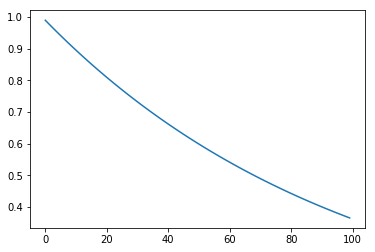

In [104]:
def newton(x, y, obj_fun, jac, hess, lr = 0.01, iterations = 100, tol = 0.01):
    beta_lsn = np.zeros(101)
    OF_iter=np.zeros(iterations)
    tol_hist=np.zeros(iterations)
    print_step = iterations/10
    for it in range(iterations):
        if (it%print_step == 0):
            print("Iteration:",it)
        grad = jac(beta_lsn,x,y)
        hessian = hess(beta_lsn,x,y)
        ddirect = -np.dot(np.linalg.inv(hessian),grad)
        ###########################
        sigma=0.1
        beta=0.1
        #alpha=1
        while (obj_fun(beta_lsn+lr*ddirect,x,y) > obj_fun(beta_lsn, x, y)+lr*sigma*np.dot(grad,ddirect)):
            lr=lr*beta
        ###########################
        beta_lsn=beta_lsn+lr*ddirect
        OF_iter[it] = obj_fun(beta_lsn,x,y)
        tol_val = np.linalg.norm(beta_ls_exact.T-beta_lsn,ord=2)/np.linalg.norm(beta_ls_exact.T,ord=2)
        tol_hist[it] = tol_val
        if (tol_val < tol):
            break
        grad_2=jac(beta_lsn,x,y)
        print(grad-grad_2)
    return (beta_lsn, OF_iter, tol_hist)

time_start = time.clock()
(beta_nw, OF_nw, tol_nw) = newton(x, y, least_sq_reg, least_sq_reg_der, least_sq_reg_hess)
time_elapsed = (time.clock() - time_start)
print('time elapsed=',time_elapsed)

plt.plot(tol_nw)

0.0009993007201181665


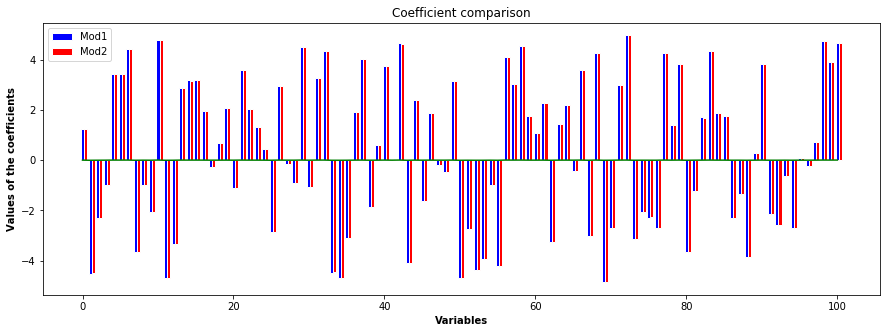

In [24]:
print(min(tol_nw[tol_nw>0]))
compare(beta_ls_exact, np.reshape(beta_nw, (101,1)))

d) Linear formulation for Least Absolute Regression

In [131]:
def quasi_newton(x, y, obj_fun, jac, hess, lr = 0.0001,iterations = 10000, tol = 0.001):
    beta_lsn = np.zeros(101)
    OF_iter=np.zeros(iterations)
    tol_hist=np.zeros(iterations)
    print_step = iterations/10
    hessian = hess(beta_lsn,x,y)
    s=np.zeros(101)
    temp=np.zeros(101)
   
    for it in range(iterations):
        if (it%print_step == 0):
            print(it)
        grad = jac(beta_lsn,x,y)
        ddirect = -np.dot(np.linalg.inv(hessian),grad)
        ###########################
        sigma=0.1
        beta=0.1
        lr=0.001
        #alpha=1
        while (obj_fun(beta_lsn+lr*ddirect,x,y) > obj_fun(beta_lsn, x, y)+lr*sigma*np.dot(ddirect.T,grad)):
            lr=lr*beta
        ###########################
        beta_lsn=beta_lsn+lr*ddirect
        OF_iter[it] = obj_fun(beta_lsn,x,y)
        tol_val = np.linalg.norm(beta_ls_exact.T-beta_lsn,ord=2)/np.linalg.norm(beta_ls_exact.T,ord=2)
        tol_hist[it] = tol_val
        
        #Defino s como el incremento de las variables
        s=beta_lsn-s
        #Defino temp como la diferencia de los gradientes!
        temp=grad-temp
        
        #Powell method
        st1=temp-np.dot(hessian,s)
        hessian=hessian + np.dot(st1,st1.T)/np.dot(st1.T,s)
       
        #BFGS method
        st2=np.dot(hessian,s)
        #hessian=hessian-(np.dot(st2,st2.T)/np.dot(s.T,st2))+(np.dot(temp,temp.T)/np.dot(temp.T,s))
        
        if (tol_val < tol):
            break
    return (beta_lsn, OF_iter, tol_hist)

time_start = time.clock()
(beta_nw, OF_nw, tol_nw) = quasi_newton(x, y, least_sq_reg, least_sq_reg_der, least_sq_reg_hess)
time_elapsed = (time.clock() - time_start)
print('time elapsed=',time_elapsed)

plt.plot(tol_nw)

0


LinAlgError: Singular matrix

In [96]:
beta_nw

array([ 0.77596508, -2.86218949, -1.45929791, -0.62231587,  2.18683679,
        2.17918637,  2.79711547, -2.3260489 , -0.63152545, -1.31761328,
        3.04660805, -2.9807623 , -2.10737552,  1.82769793,  2.01307453,
        2.01490909,  1.24411041, -0.16441934,  0.43091863,  1.32865562,
       -0.7098015 ,  2.2877329 ,  1.301407  ,  0.84437117,  0.29449903,
       -1.80380833,  1.88472726, -0.09535902, -0.5791425 ,  2.8692321 ,
       -0.68578314,  2.08642803,  2.7627786 , -2.83834897, -2.96584964,
       -1.95866303,  1.2272949 ,  2.54793865, -1.17674768,  0.38006286,
        2.38373921,  0.02330665,  2.9459082 , -2.59721934,  1.52267215,
       -1.0357933 ,  1.20013773, -0.11313851, -0.29086688,  1.99044146,
       -2.97501156, -1.74254187, -2.78352327, -2.49858968, -0.62005793,
       -2.66770634,  2.61565056,  1.92655327,  2.87858623,  1.11803247,
        0.69407495,  1.44985745, -2.0671259 ,  0.92097957,  1.39008032,
       -0.26812615,  2.27579664, -1.92514106,  2.69879526, -3.08